## Reaction Analysing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
new_df = pd.read_csv('new-final-project-CTA2004thaythuantoan.csv')

Find the info of the reaction_count column

In [5]:
new_df["reaction_count"].describe()

count      100.000000
mean      1299.770000
std       2569.470628
min         11.000000
25%       1009.000000
50%       1091.500000
75%       1239.750000
max      26328.000000
Name: reaction_count, dtype: float64

Count the reactions of 10 newest posts

In [3]:
reactions_newest_posts_count = new_df['reaction_count'].head(10).sum()
reactions_newest_posts_count

6627

Count the reactions of 10 oldest posts

In [4]:
reactions_oldest_posts_count = new_df['reaction_count'].tail(10).sum()
reactions_oldest_posts_count

11761

Find the post with maximum reaction

In [6]:
max_post_reaction = new_df[new_df["reaction_count"] == new_df["reaction_count"].max()]
max_post_reaction

,post_id,text,post_text,time,timestamp,images,images_description,images_lowquality,images_lowquality_description,comments,...,username,user_url,available,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,fetched_time
88,370040382252740,2k5 vỡ oà vì cứ tưởng lên đại học nhàn lắm :))...,2k5 vỡ oà vì cứ tưởng lên đại học nhàn lắm :))...,2023-11-08 19:58:50,1699448330,[],[],['https://scontent.fhan2-4.fna.fbcdn.net/v/t15...,[None],3191,...,"Thầy Thuận Toán - Chuyên Luyện Thi Đại Học 10,...",https://facebook.com/thaythuantoan?eav=Afbfjwy...,True,"[{'comment_id': '6529816220449182', 'comment_u...","[{'name': 'Hải Chiến', 'link': 'https://facebo...",https://www.facebook.com/thaythuantoan/posts/3...,"{'thích': 11994, 'yêu thích': 147, 'haha': 133...",26328,315850762579423,2023-11-20 15:27:42.774623


Find the post with minimum reaction

In [7]:
min_post_reaction = new_df[new_df["reaction_count"] == new_df["reaction_count"].min()]
min_post_reaction

,post_id,text,post_text,time,timestamp,images,images_description,images_lowquality,images_lowquality_description,comments,...,username,user_url,available,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,fetched_time
14,375531758370269,PODCAST #1: Tình yêu học trò thời của thầy 🥰 #...,PODCAST #1: Tình yêu học trò thời của thầy 🥰 #...,2023-11-18 23:00:41,1700323241,[],[],['https://scontent.fhan2-3.fna.fbcdn.net/v/t15...,[None],1,...,"Thầy Thuận Toán - Chuyên Luyện Thi Đại Học 10,...",https://facebook.com/thaythuantoan?eav=AfY3jXs...,True,"[{'comment_id': '1358169068239955', 'comment_u...","[{'name': 'Anh Tú Nguyen', 'link': 'https://fa...",https://www.facebook.com/thaythuantoan/posts/3...,"{'thích': 8, 'yêu thích': 3}",11,315850762579423,2023-11-20 15:11:33.525305


Draw the bar chart to compare the reaction of 10 newest posts and 10 oldest posts

<function matplotlib.pyplot.show(close=None, block=None)>

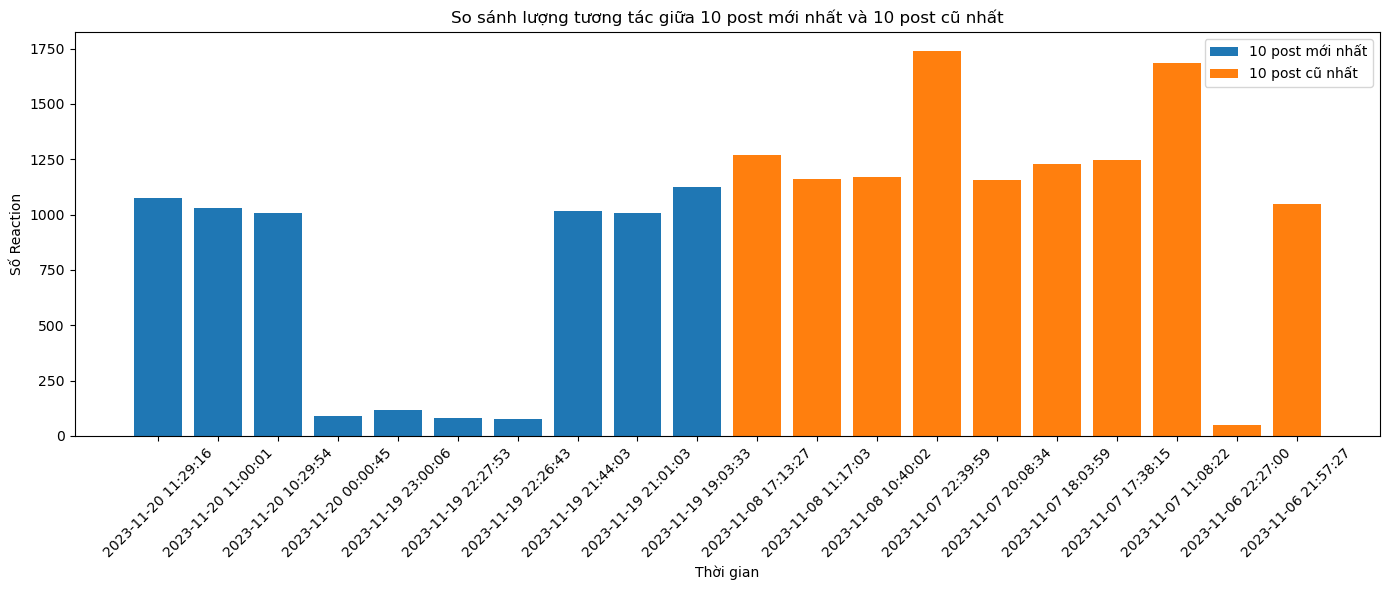

In [8]:
ten_newest_posts = new_df.head(10)
ten_oldest_posts = new_df.tail(10)

plt.figure(figsize= (14, 6))
plt.bar(ten_newest_posts['time'], ten_newest_posts['reaction_count'], label='10 post mới nhất')
plt.bar(ten_oldest_posts['time'], ten_oldest_posts['reaction_count'], label='10 post cũ nhất')

plt.xlabel('Thời gian')
plt.ylabel('Số Reaction')
plt.title('So sánh lượng tương tác giữa 10 post mới nhất và 10 post cũ nhất')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show

Draw the chart of the change of the reaction of 100 posts 

Text(2023-11-18 23:00:41, -989, 'Min:11,Time:2023-11-18 23:00:41')

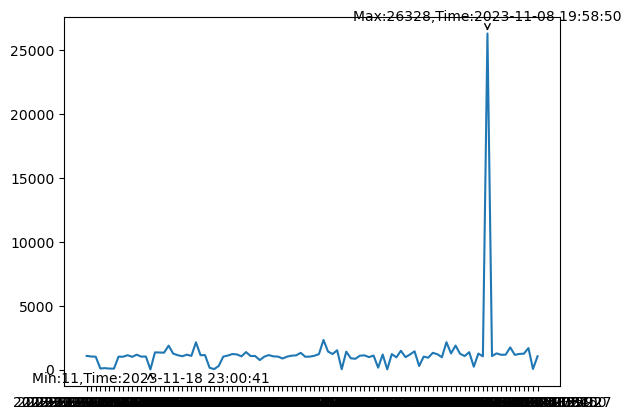

In [9]:
plt.plot(new_df['time'], new_df['reaction_count'])
max_y_value = new_df['reaction_count'].max()
max_index = new_df['reaction_count'].idxmax()  
max_x_value = new_df.loc[max_index, 'time']

plt.annotate(f'Max:{max_y_value},Time:{max_x_value}', 
             xy=(max_x_value, max_y_value), 
             xytext=(max_x_value, max_y_value + 1000),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='center')

min_y_value = new_df['reaction_count'].min()
min_index = new_df['reaction_count'].idxmin()  
min_x_value = new_df.loc[min_index, 'time']

plt.annotate(f'Min:{min_y_value},Time:{min_x_value}', 
             xy=(min_x_value, min_y_value), 
             xytext=(min_x_value, min_y_value - 1000),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='center')

The chart to show the detail of the reactions of the post has maximum reactions

In [5]:
max_row = new_df.iloc[new_df["reaction_count"].idxmax()]

max_reactions = dict(eval(max_row['reactions']))
max_reactions["shares"] = max_row['shares']
max_reactions["comments"] = max_row['comments']

max_reactions

{'thích': 11994,
 'yêu thích': 147,
 'haha': 13397,
 'wow': 60,
 'thương thương': 19,
 'buồn': 707,
 'phẫn nộ': 4,
 'shares': 869,
 'comments': 3191}

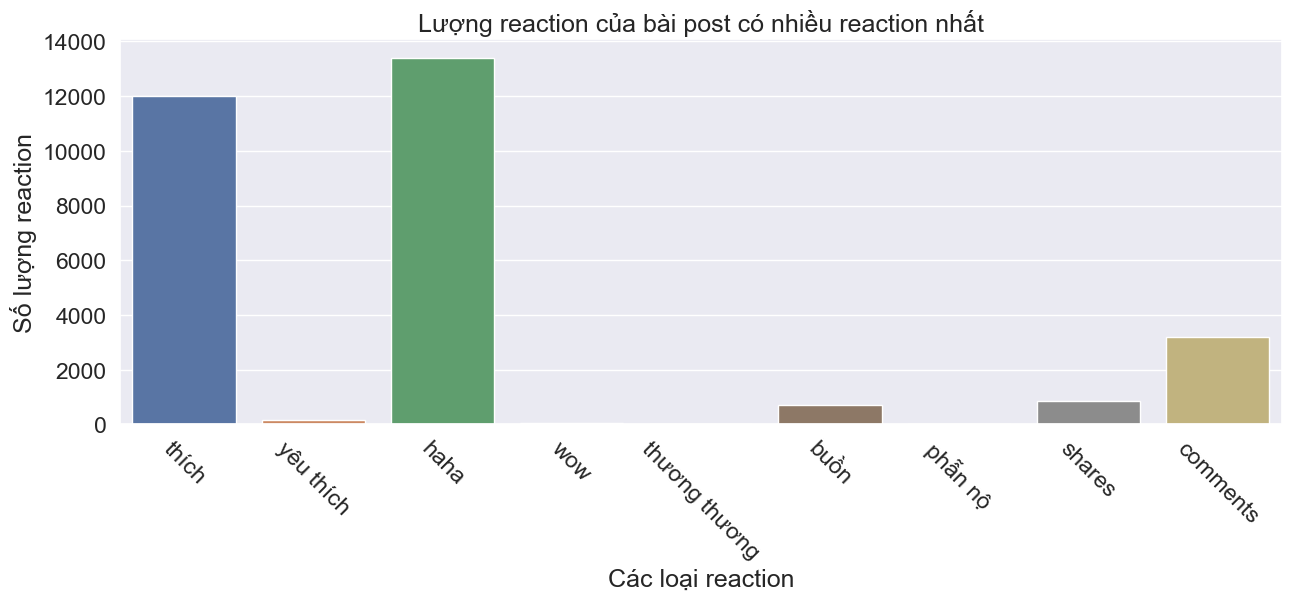

In [6]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

fig, ax = plt.subplots()
ax = sns.barplot(x=list(max_reactions.keys()), y=list(max_reactions.values()))
ax.set_title("Lượng reaction của bài post có nhiều reaction nhất")
ax.set_ylabel("Số lượng reaction")
ax.set_xlabel("Các loại reaction")
plt.xticks(rotation=-45)
plt.show()

In [15]:
print("Số thích lớn nhất: ", int(new_df['thích'].max()))
print("Số yêu thích lớn nhất: ", int(new_df['yêu thích'].max()))
print("Số haha lớn nhất: ", int(new_df['haha'].max()))
print("Số thương thương lớn nhất: ", int(new_df['thương thương'].max()))
print("Số wow lớn nhất: ", int(new_df['wow'].max()))
print("Số buồn lớn nhất: ", int(new_df['buồn'].max()))
print("Số phẫn nộ lớn nhất: ", int(new_df['phẫn nộ'].max()))

Số thích lớn nhất:  11994
Số yêu thích lớn nhất:  577
Số haha lớn nhất:  13397
Số thương thương lớn nhất:  19
Số wow lớn nhất:  60
Số buồn lớn nhất:  707
Số phẫn nộ lớn nhất:  4


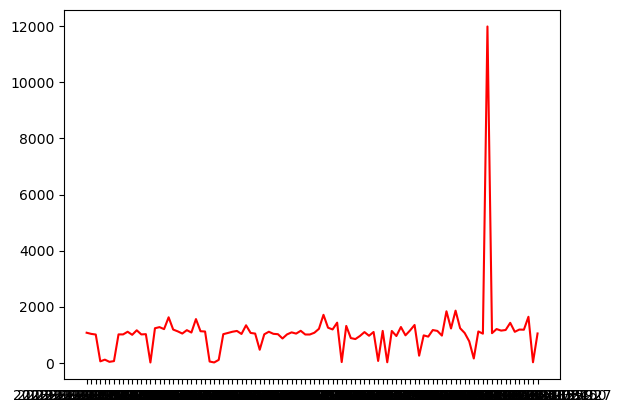

In [4]:
plt.plot(new_df['time'], new_df['thích'], color = "red")

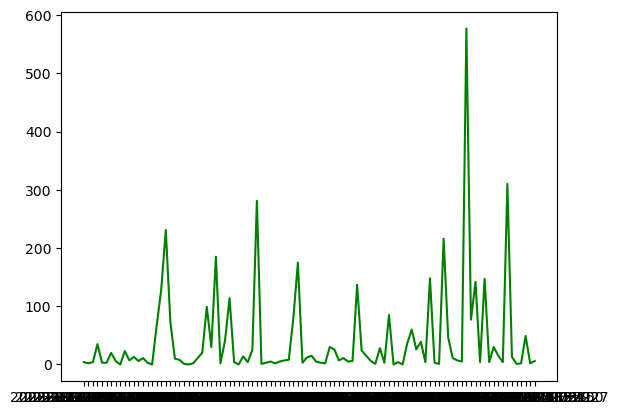

In [6]:
plt.plot(new_df['time'], new_df['yêu thích'], color = "green")

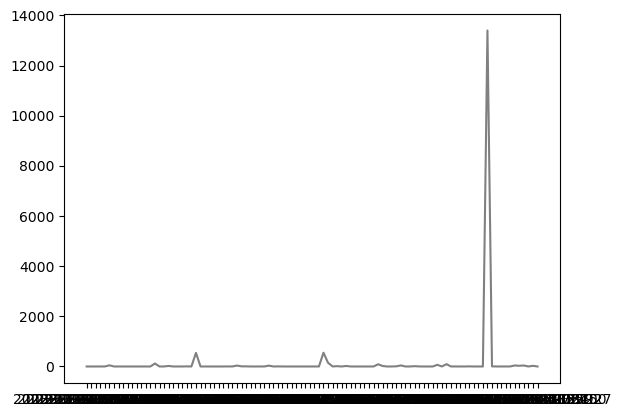

In [8]:
plt.plot(new_df['time'], new_df['haha'], color = "grey")

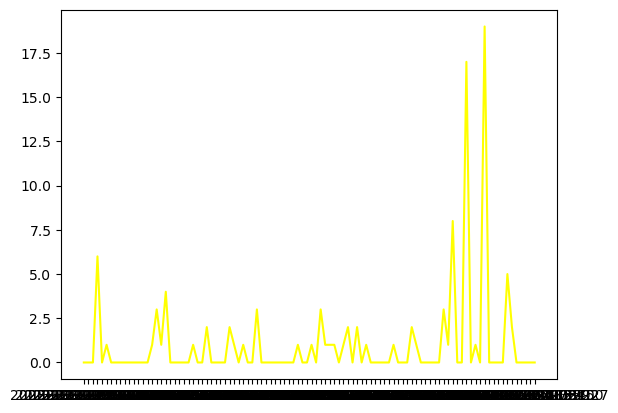

In [9]:
plt.plot(new_df['time'], new_df['thương thương'], color = "yellow")

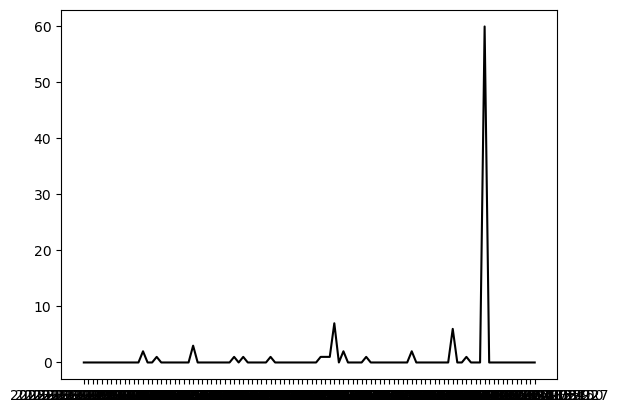

In [4]:
plt.plot(new_df['time'], new_df['wow'], color = "black")

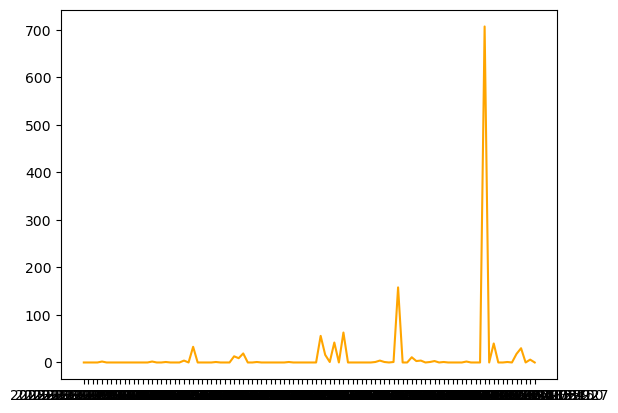

In [10]:
plt.plot(new_df['time'], new_df['buồn'], color = "orange")

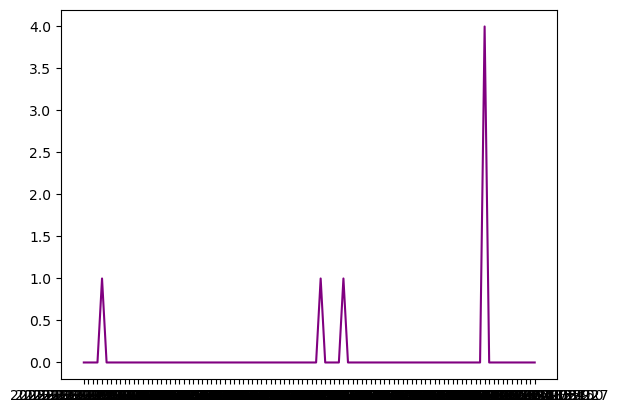

In [11]:
plt.plot(new_df['time'], new_df['phẫn nộ'], color = "purple")

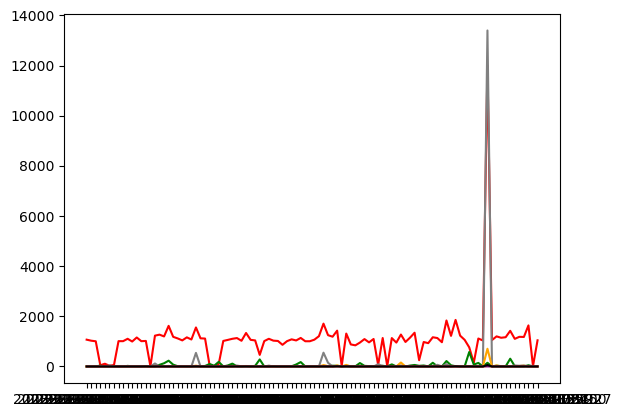

In [5]:
plt.plot(new_df['time'], new_df['thích'], color = "red")
plt.plot(new_df['time'], new_df['yêu thích'], color = "green")
plt.plot(new_df['time'], new_df['haha'], color = "grey")
plt.plot(new_df['time'], new_df['thương thương'], color = "yellow")
plt.plot(new_df['time'], new_df['buồn'], color = "orange")
plt.plot(new_df['time'], new_df['phẫn nộ'], color = "purple")
plt.plot(new_df['time'], new_df['wow'], color = "black")